**DataLoader**  

In [4]:
# Test dataloader and image transformations
from dataset import create_loaders
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load single aia iris image pair
train_loader, test_loader = create_loaders(test_percent=0.2, batch_size=1, sdo_channels=['171'], iris_channel='1400')
iris_ims, sdo_ims = next(iter(train_loader))
print(iris_ims.shape, sdo_ims.shape)

torch.Size([1, 1, 548, 504]) torch.Size([1, 1, 471, 450])


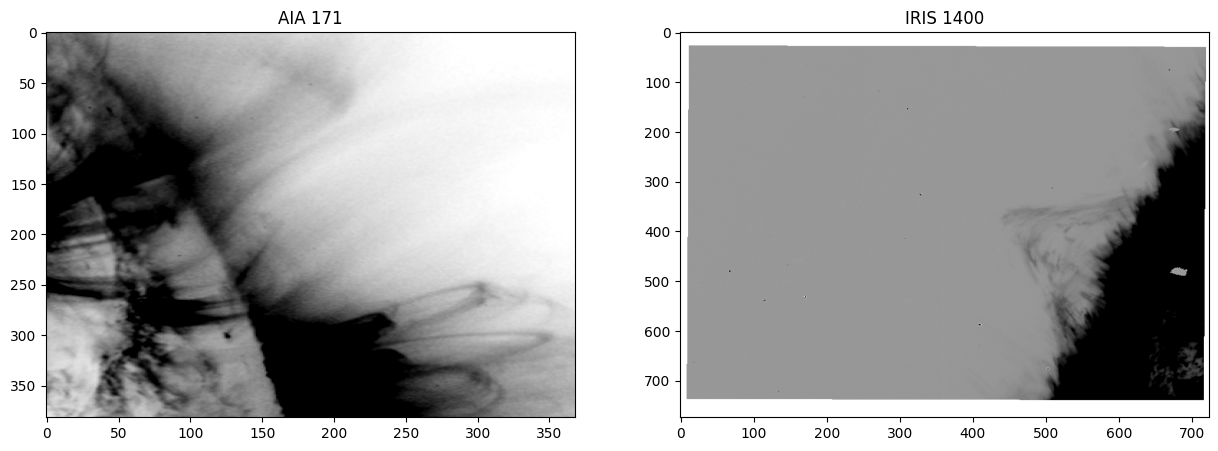

In [11]:
# plot image pair
aia_im = np.squeeze(sdo_ims[0, 0, :, :].numpy())
iris_im = np.squeeze(iris_ims[0, 0, :, :].numpy())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('AIA 171')
ax1.imshow(aia_im, aspect='auto', cmap='binary')
ax2.set_title('IRIS 1400')
ax2.imshow(iris_im, aspect='auto', cmap='binary')
plt.show()

**Generator**

In [24]:
import torch
from generator import Generator

# Create fake input
x = torch.randn(1, 1, 250, 250)
# Create generator
G = Generator(num_res_blocks=9)
# Pass fake input through generator
y = G(x)
print(y.shape)


torch.Size([1, 1, 250, 250])


**Discriminator**

In [25]:
import torch 
from discriminator import Discriminator

# Create fake input
x = torch.randn((1, 1, 250, 250))
# Create discriminator
D = Discriminator()
# Pass fake input through discriminator
y = D(x)
print(y.shape)

torch.Size([1, 1, 30, 30])
